In [ ]:
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!unzip "/content/drive/MyDrive/blood_cell/archive.zip" -d "/content/data/"

Streaming output truncated to the last 5000 lines.
  inflating: /content/data/dataset2-master/dataset2-master/images/TRAIN/LYMPHOCYTE/_9_8050.jpeg  
  inflating: /content/data/dataset2-master/dataset2-master/images/TRAIN/LYMPHOCYTE/_9_8167.jpeg  
  inflating: /content/data/dataset2-master/dataset2-master/images/TRAIN/LYMPHOCYTE/_9_8283.jpeg  
  inflating: /content/data/dataset2-master/dataset2-master/images/TRAIN/LYMPHOCYTE/_9_8324.jpeg  
  inflating: /content/data/dataset2-master/dataset2-master/images/TRAIN/LYMPHOCYTE/_9_8379.jpeg  
  inflating: /content/data/dataset2-master/dataset2-master/images/TRAIN/LYMPHOCYTE/_9_8577.jpeg  
  inflating: /content/data/dataset2-master/dataset2-master/images/TRAIN/LYMPHOCYTE/_9_8587.jpeg  
  inflating: /content/data/dataset2-master/dataset2-master/images/TRAIN/LYMPHOCYTE/_9_8655.jpeg  
  inflating: /content/data/dataset2-master/dataset2-master/images/TRAIN/LYMPHOCYTE/_9_8701.jpeg  
  inflating: /content/data/dataset2-master/dataset2-master/images/T

In [ ]:
# Define paths
train_dir = r'/content/data/dataset2-master/dataset2-master/images/TRAIN'
test_dir = r'/content/data/dataset2-master/dataset2-master/images/TRAIN'
image_path = r'/content/data/dataset2-master/dataset2-master/images/TEST_SIMPLE/EOSINOPHIL/_2_1226.jpeg'

In [ ]:
train_gen = tf.keras.preprocessing.image.ImageDataGenerator(preprocessing_function = tf.keras.applications.mobilenet_v2.preprocess_input, validation_split = 0.2)
test_gen = tf.keras.preprocessing.image.ImageDataGenerator(preprocessing_function = tf.keras.applications.mobilenet_v2.preprocess_input)


In [ ]:
train_images = train_gen.flow_from_directory(
directory = train_dir, target_size = (224,224), color_mode = 'rgb', class_mode = 'categorical', batch_size = 32, shuffle = True, seed = 40, subset = 'training')
val_images = train_gen.flow_from_directory(
directory = train_dir, target_size = (224,224), color_mode = 'rgb', class_mode = 'categorical', batch_size = 32, shuffle = True, seed = 40, subset = 'training')
test_images = train_gen.flow_from_directory(
directory = test_dir, target_size = (224,224), color_mode = 'rgb', class_mode = 'categorical', batch_size = 32, shuffle = False, seed = 40, subset = 'training')


Found 7968 images belonging to 4 classes.
Found 7968 images belonging to 4 classes.
Found 7968 images belonging to 4 classes.


In [ ]:
pretrained_model = tf.keras.applications.MobileNetV2(
    input_shape=(224, 224, 3),
    include_top=False,
    weights='imagenet',
    pooling='avg'
)

pretrained_model.trainable = False

9406464/9406464 [==============================] - 1s 0us/step


In [ ]:
inputs = pretrained_model.input
x = tf.keras.layers.Dense(128, activation='relu')(pretrained_model.output)
outputs = tf.keras.layers.Dense(4, activation='softmax')(x)

model = tf.keras.Model(inputs=inputs, outputs=outputs)

model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

print(model.summary())

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 Conv1 (Conv2D)              (None, 112, 112, 32)         864       ['input_1[0][0]']             
                                                                                                  
 bn_Conv1 (BatchNormalizati  (None, 112, 112, 32)         128       ['Conv1[0][0]']               
 on)                                                                                              
                                                                                                  
 Conv1_relu (ReLU)           (None, 112, 112, 32)         0         ['bn_Conv1[0][0]']        

In [ ]:
history = model.fit(
    train_images,
    validation_data=val_images,
    epochs=20,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(
            monitor='val_loss',
            patience=3,
            restore_best_weights=True
        )
    ]
)

Epoch 1/20
249/249 [==============================] - 39s 129ms/step - loss: 0.8410 - accuracy: 0.6569 - val_loss: 0.5716 - val_accuracy: 0.7804
Epoch 2/20
249/249 [==============================] - 37s 149ms/step - loss: 0.4731 - accuracy: 0.8203 - val_loss: 0.4069 - val_accuracy: 0.8461
Epoch 3/20
249/249 [==============================] - 31s 126ms/step - loss: 0.3577 - accuracy: 0.8668 - val_loss: 0.2682 - val_accuracy: 0.9006
Epoch 4/20
249/249 [==============================] - 31s 125ms/step - loss: 0.2691 - accuracy: 0.9021 - val_loss: 0.2470 - val_accuracy: 0.9098
Epoch 5/20
249/249 [==============================] - 31s 125ms/step - loss: 0.2155 - accuracy: 0.9234 - val_loss: 0.1504 - val_accuracy: 0.9553
Epoch 6/20
249/249 [==============================] - 37s 147ms/step - loss: 0.1645 - accuracy: 0.9455 - val_loss: 0.1176 - val_accuracy: 0.9670
Epoch 7/20
249/249 [==============================] - 32s 131ms/step - loss: 0.1426 - accuracy: 0.9534 - val_loss: 0.1210 - val_ac

In [ ]:
model.save('/content/drive/MyDrive/blood_cell/wbc_mobilenetV2.h5')


In [ ]:
CLASS_NAMES = list(train_images.class_indices.keys())
CLASS_NAMES

['EOSINOPHIL', 'LYMPHOCYTE', 'MONOCYTE', 'NEUTROPHIL']

Found 1989 images belonging to 4 classes.
63/63 [==============================] - 11s 121ms/step
Validation Accuracy: 94.419%


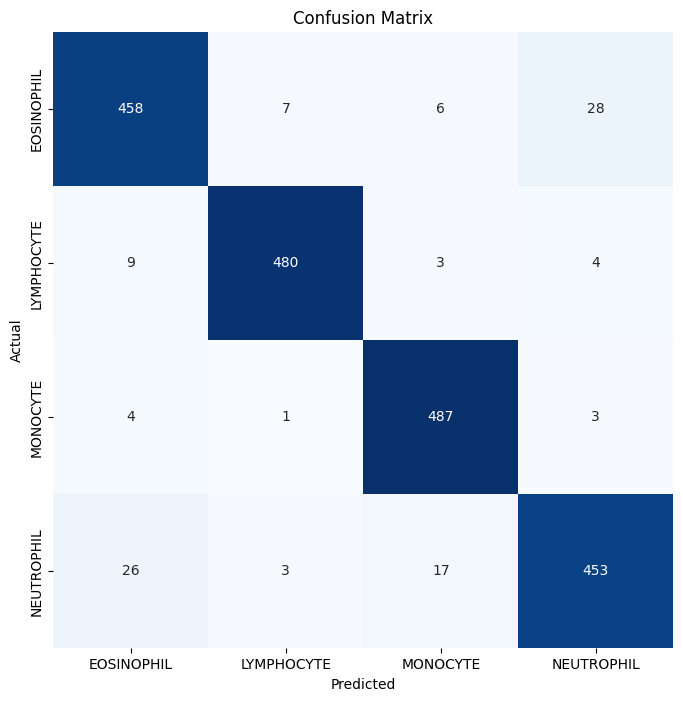

Classification Report:
----------------------
               precision    recall  f1-score   support

  EOSINOPHIL       0.92      0.92      0.92       499
  LYMPHOCYTE       0.98      0.97      0.97       496
    MONOCYTE       0.95      0.98      0.97       495
  NEUTROPHIL       0.93      0.91      0.92       499

    accuracy                           0.94      1989
   macro avg       0.94      0.94      0.94      1989
weighted avg       0.94      0.94      0.94      1989



In [ ]:
val_images = train_gen.flow_from_directory(
    directory=train_dir,
    target_size=(224, 224),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=32,
    shuffle=False,
    seed=42,
    subset='validation'
)


predictions = np.argmax(model.predict(val_images), axis=1)

acc = accuracy_score(val_images.labels, predictions)
cm = tf.math.confusion_matrix(val_images.labels, predictions)
clr = classification_report(val_images.labels, predictions, target_names=CLASS_NAMES)

print("Validation Accuracy: {:.3f}%".format(acc * 100))

plt.figure(figsize=(8, 8))
sns.heatmap(cm, annot=True, fmt='g', vmin=0, cmap='Blues', cbar=False)
plt.xticks(ticks= np.arange(4) + 0.5, labels=CLASS_NAMES)
plt.yticks(ticks= np.arange(4) + 0.5, labels=CLASS_NAMES)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

print("Classification Report:\n----------------------\n", clr)

1/1 [==============================] - 0s 22ms/step
Predicted class: Eosinophil


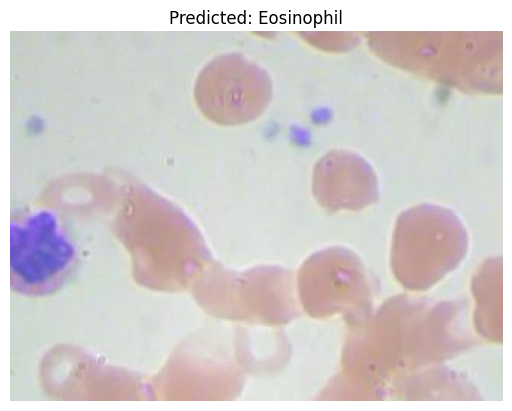

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input, decode_predictions
import matplotlib.pyplot as plt


def load_and_preprocess_image(img_path):
    img = image.load_img(img_path, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = preprocess_input(img_array)
    return img_array

test_image_path = image_path

img_array = load_and_preprocess_image(test_image_path)

predictions = model.predict(img_array)
predicted_class = np.argmax(predictions, axis=1)

CLASS_NAMES = ['Eosinophil', 'Lymphocyte', 'Monocyte', 'Neutrophil']
predicted_class_name = CLASS_NAMES[predicted_class[0]]

print(f"Predicted class: {predicted_class_name}")

plt.imshow(image.load_img(test_image_path))
plt.title(f"Predicted: {predicted_class_name}")
plt.axis('off')
plt.show()
